한번 모두실행 하고 기다렸다가 런타임 다시시작 및 다시실행 누를 것

# EDA

### 드라이브 환경 세팅 및 import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from google.colab import drive

import matplotlib.ticker as ticker
from matplotlib import dates
import datetime as dt
from collections import Counter as C



In [2]:
!pip install darts
!pip install utils


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
drive.mount('/content/drive') #구글 드라이브 접속하려면 이거 써야함
%cd ./drive/Shareddrives/AI_Rights/ 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/Shareddrives/AI_Rights


### Data 불러오기

In [4]:
df = pd.read_csv('./DATA/Battery.csv', encoding='CP949') #데이터 불러오기


In [5]:
df.head(1)

,국가코드,DB종류,특허/실용 구분,문헌종류 코드,발명의 명칭,요약,대표청구항,청구항 수,출원번호,출원일,...,등록일,출원인,발명자,우선권 번호,우선권 국가,우선권 주장일,국제 출원일,Original IPC Main,Original IPC All,WIPS ON key
0,KR,KR,P,A,"인-도핑된 흑연질 탄소 질화물로 이루어진 계면층을 포함하는 리튬이차전지용 음극, 이...",본 발명은 인-도핑된 흑연질 탄소 질화물로 이루어진 계면층을 포함하여 면방향의 리튬...,"리튬 금속층; 및상기 리튬 금속층 상에 위치하는 계면층;을 포함하고,상기 계면층은 ...",17,10-2021-0058425,2021-05-06,...,NaN,현대자동차주식회사 | 기아 주식회사 | 한국과학기술원,송종찬 | 신재욱 | 이지용 | 하성민 | 김희탁 | 노영일,NaN,NaN,NaN,NaN,H01M-004/134,H01M-004/134 | H01M-010/052 | H01M-010/058 | H...,3.520000e+12


In [6]:
df['국가코드'].unique()

array(['KR', 'CN', 'US', 'JP'], dtype=object)

In [7]:
KR = df[df['국가코드']=='KR']
CN = df[df['국가코드']=='CN']
US = df[df['국가코드']=='US']
JP = df[df['국가코드']=='JP']


In [8]:
print(len(df)) # 총 데이터 개수

20000


In [9]:
for i in df.columns: #column 명
  print(i)

국가코드
DB종류
특허/실용 구분
문헌종류 코드
발명의 명칭
요약
대표청구항
청구항 수
출원번호
출원일
공개번호
공개일
등록번호
등록일
출원인
발명자
우선권 번호
우선권 국가
우선권 주장일
국제 출원일
Original IPC Main
Original IPC All
WIPS ON key


In [10]:
df2 = df.copy()
df2['출원일'] = df2['출원일'].apply(lambda x: str(dt.datetime.strptime(x[:7], "%Y-%m"))[:7])
sorted_df = df.sort_values("출원일")


In [11]:
df.info() #Dtype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   국가코드               20000 non-null  object 
 1   DB종류               20000 non-null  object 
 2   특허/실용 구분           20000 non-null  object 
 3   문헌종류 코드            20000 non-null  object 
 4   발명의 명칭             20000 non-null  object 
 5   요약                 20000 non-null  object 
 6   대표청구항              19574 non-null  object 
 7   청구항 수              20000 non-null  int64  
 8   출원번호               20000 non-null  object 
 9   출원일                20000 non-null  object 
 10  공개번호               13006 non-null  object 
 11  공개일                13006 non-null  object 
 12  등록번호               10807 non-null  object 
 13  등록일                10790 non-null  object 
 14  출원인                19935 non-null  object 
 15  발명자                20000 non-null  object 
 16  우선권 번호             218

## 월 단위 개수 plotting

In [12]:
from scipy.ndimage.filters import gaussian_filter1d
def smoothing(y):
  ysmoothed = gaussian_filter1d(y, sigma=2)
  return ysmoothed

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

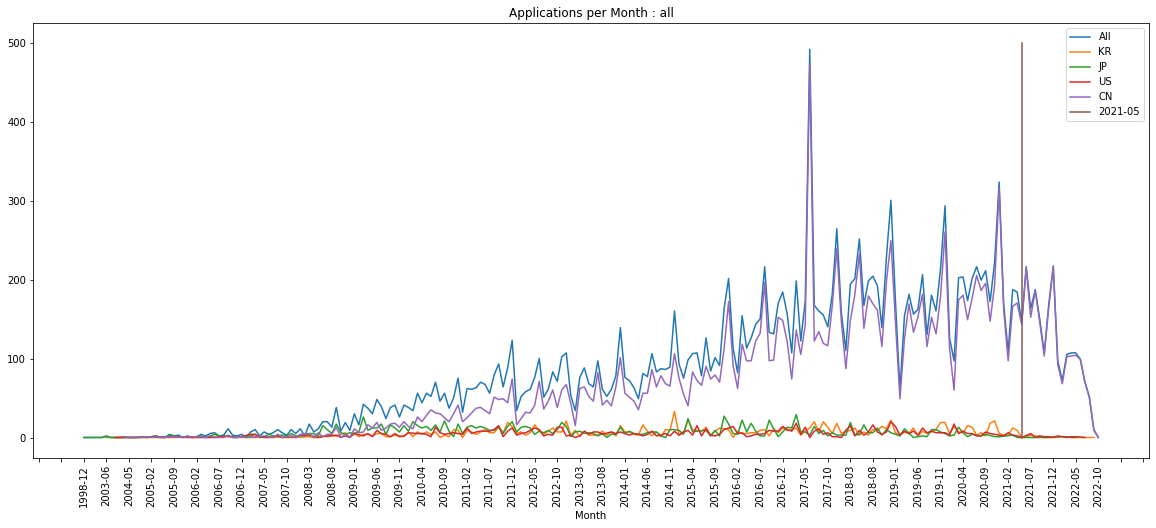

In [13]:
All = df.copy()
month_18 = ['2021-05','2021-05']
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

def count(df2):
  df2['출원일'] = df2['출원일'].apply(lambda x: str(dt.datetime.strptime(x[:7], "%Y-%m"))[:7]) #월 단위 자름
  sorted_df = df2.sort_values('출원일')
  Count = C(sorted_df['출원일'])
  return Count

def month_plotting(ctry,xline, *df2):
  plt.figure(figsize=(20,8))
  ax=plt.axes()
  ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
  for i in (df2):
    name = get_df_name(i)
    Count = count(i)
    plt.plot(list(Count.keys()),list(Count.values()),label=name)
  plt.plot(xline,[0,500],label='2021-05')
  plt.legend()
  plt.xticks(rotation=90,)
  plt.xlabel('Month')
  plt.title(f"Applications per Month : {ctry}")
  plt.show()

month_plotting("all",month_18,All,KR,JP,US,CN,)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

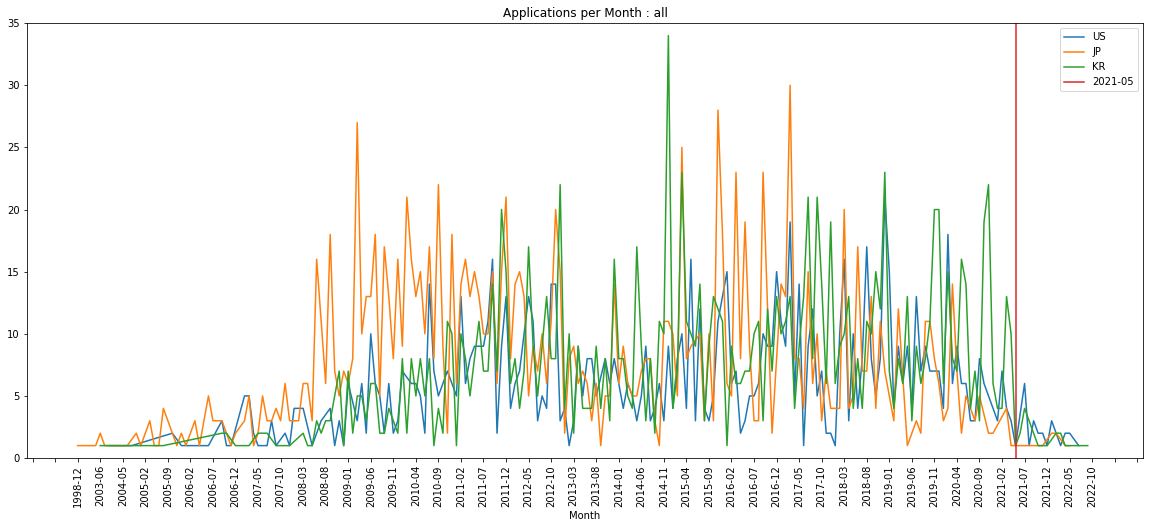

In [14]:
def month_plotting_2(ctry,xline,all, *df2):
  plt.figure(figsize=(20,8))
  ax=plt.axes()
  ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
  x_label = list(count(all).keys())
  plt.plot(x_label,[0 for i in range(len(x_label))],c='white')
  for i in (df2):
    name = get_df_name(i)
    Count = count(i)
    plt.plot(list(Count.keys()),list(Count.values()),label=name)
  plt.plot(xline,[0,35],label='2021-05')
  plt.legend()
  plt.xticks(rotation=90,)
  plt.xlabel('Month')
  plt.title(f"Applications per Month : {ctry}")
  plt.ylim(0,35)
  plt.show()

month_plotting_2("all",month_18,All,US,JP,KR,)

## 연단위 개수 plotting 및 CDF

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


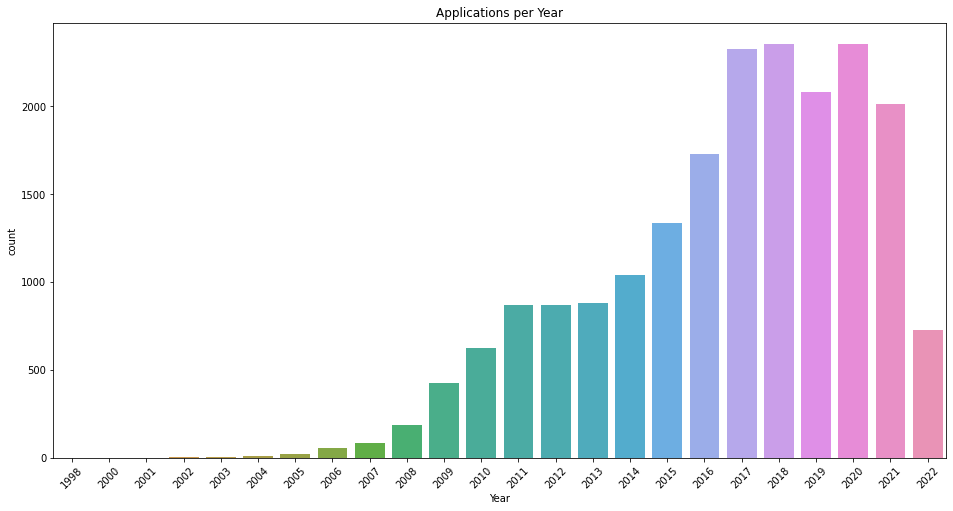

In [15]:
df3 = df.copy()

df3['출원일'] = df3['출원일'].apply(lambda x: str(dt.datetime.strptime(x[:4], "%Y"))[:4]) #연 단위 자름
sorted_df_2 = df3.sort_values('출원일')
plt.figure(figsize=(16,8))
ax=plt.axes()
sns.countplot(sorted_df_2['출원일'],)
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.title("Applications per Year")
plt.show()

CDF

In [16]:
slist = sorted_df_2['출원일'].tolist()
def to_sequential_data(slist):
  count = C(slist)
  date = count.keys()
  s_data = pd.DataFrame(count.values(),date,)
  s_data.columns=['date']
  s_data = s_data.sort_index()
  min_year = int(s_data.index[0])
  max_year = int(s_data.index[-1])
  print(min_year, max_year)
  print(max_year-min_year)
  return s_data, min_year, max_year

s_data, min_year, max_year = to_sequential_data(slist)


1998 2022
24


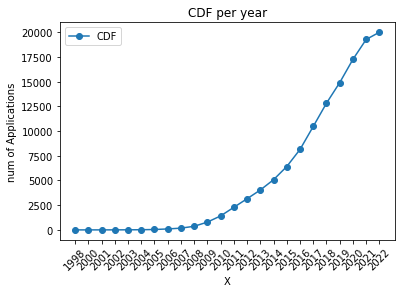

In [17]:
x=s_data.index
y=s_data['date']
cdf=np.cumsum(y)
plt.xticks(rotation=45)
plt.plot(x,cdf,marker="o",label="CDF")
plt.xlabel("X")
plt.ylabel("num of Applications")
plt.title("CDF per year")
plt.legend()
plt.show()

## 월단위 시계열 분석

### 월단위로 전처리 part

In [25]:
from darts.utils.missing_values import fill_missing_values
from darts import TimeSeries
from darts.models import ExponentialSmoothing
from darts.models import ARIMA
from darts.metrics import mape



#오류나면 runtime 재시작, 다시 실행 할 것

In [26]:
def return_sorted(data):
  df2 = data.copy()
  df2['출원일'] = df2['출원일'].apply(lambda x: str(dt.datetime.strptime(x[:7], "%Y-%m"))[:7])
  sorted_df = df2.sort_values("출원일")
  return sorted_df

sorted_df = return_sorted(df)

In [27]:
def preprocessing(data):
  slist = data['출원일'].tolist()
  count = C(slist)
  date = count.keys()
  s_data = pd.DataFrame(count.values(),date,)
  s_data.columns=['num']
  s_data['date'] = s_data.index
  s_2 = s_data
  s_data['date'] = s_data['date'].apply(lambda x: (int(x[:4])-min_year)*12 + int(x[5:7])-12)
  return s_data

s_data = preprocessing(sorted_df)

In [28]:
def to_timeSeries(s_data):
  s_data.index = s_data['date']
  s_data.drop(columns = ['date'],axis =1, inplace = True)
  time = {}
  s_data = s_data.sort_index()
  print(len(s_data))
  for i in range(sorted(s_data.index)[-1]):
    if i not in s_data.index:
      time[i] = 0
  v_data = pd.DataFrame(index=time.keys(),columns=['num'],data=time.values())
  s_data = s_data.append(v_data,)
  s_data['date'] = s_data.index
  min_val = min(s_data['num'])
  max_val = max(s_data['num'])
  series = TimeSeries.from_dataframe(s_data, 'date','num')
  return series, max_val, min_val

In [37]:
def forward(df):
  sorted_df = return_sorted(df)
  s_data = preprocessing(sorted_df)
  series, max_val, min_val = to_timeSeries(s_data)
  return series, max_val, min_val

series, max_val, min_val = forward(df)

226


In [43]:
"""
series : series 데이터 넣기
num: 에는 몇 시점 예측할 건지 기입
  ex 현재 11월 기준, num = 5시, 11, 10, 9, 8, 7 월은 이전 데이터로 예측 진행
model: 사용할 모델 함수로 입력
  from darts.models import ExponentialSmoothing
  model = ExponentialSmoothing()
"""
def model_run(series, max_val,min_val, num, model):
  train, val = series[:-num], series[-num:]
  model = model
  model.fit(train)
  plt.figure(figsize=(16,8))
  prediction = model.predict(len(val), num_samples=1000)
  series[:-num].plot(label = "actual_before 2021,05", c='black')
  series[-num:].plot(label = "actual_after 2021,05", c='red')
  x1 = x2 = len(series)-num
  y1, y2 = 0, max_val
  plt.axline((x1, y1), (x2, y2),c="green",label='18_months')
  prediction.plot(label="predicted", low_quantile=0.05, high_quantile=0.95,c='blue')
  plt.xlabel('Month')
  plt.ylabel("num of applications")
  plt.legend()
  plt.title('prediction_plot')
  plt.show()

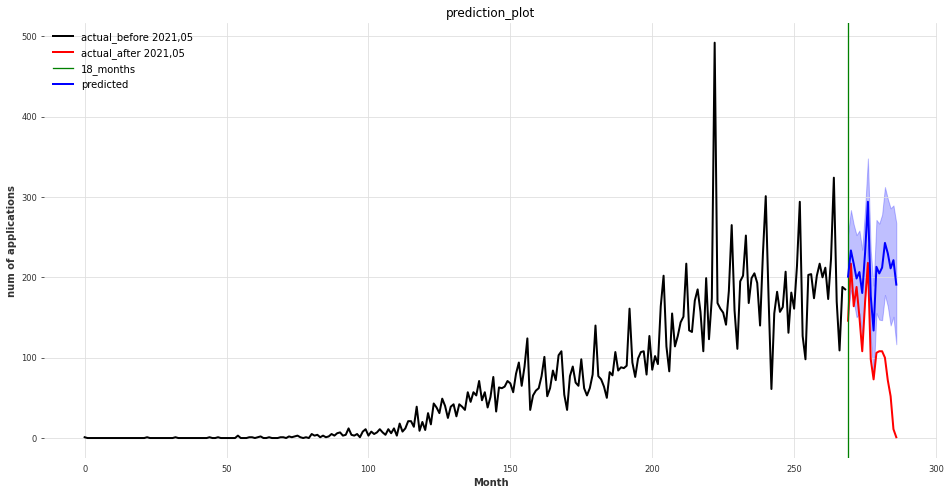

In [44]:
model_run(series,max_val,min_val, 18, ExponentialSmoothing()) #Exponential

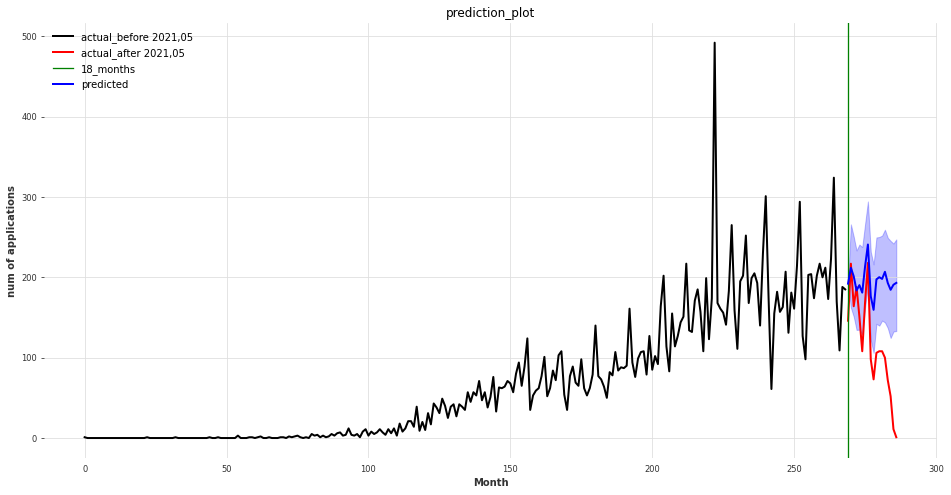

In [45]:
model_run(series,max_val, min_val, 18, ARIMA()) #ARIMA

##한국

176


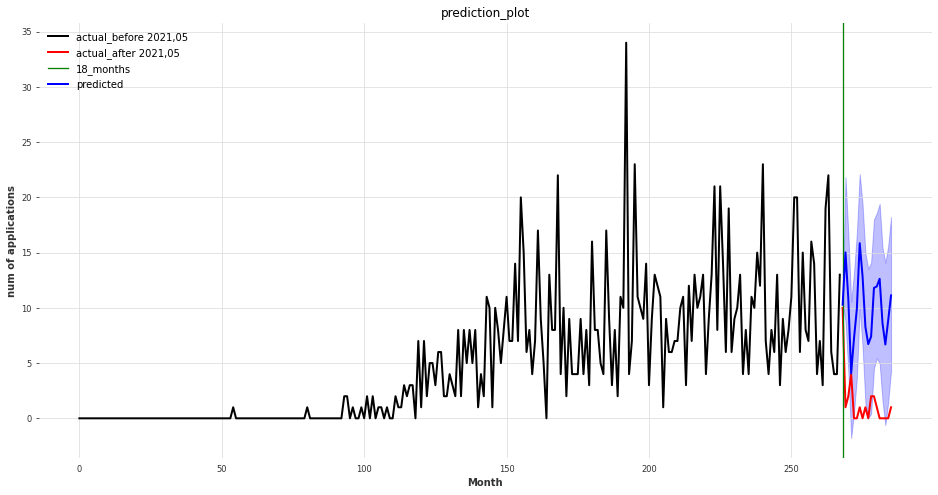

In [46]:
series_KR,max_val,min_val = forward(KR)
model_run(series_KR, max_val, min_val, 18, ARIMA()) #ARIMA

## 중국

194


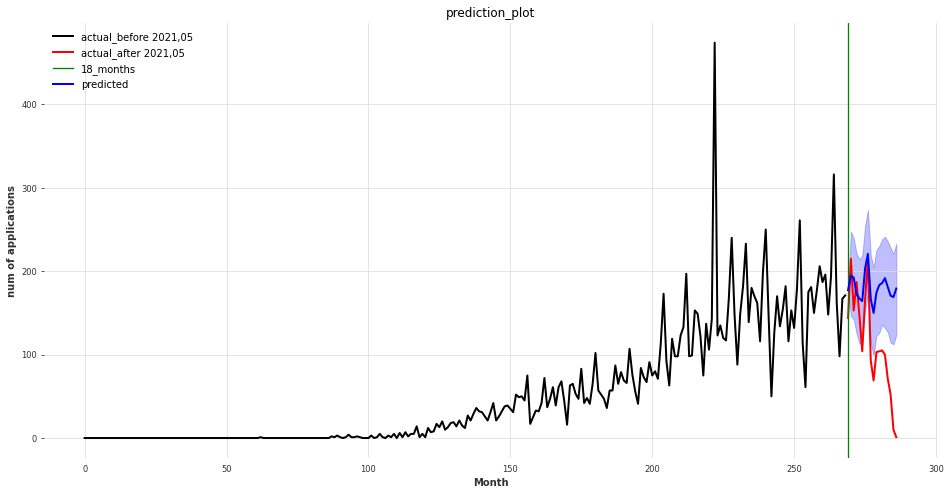

In [47]:
series_CN,max_val,min_val = forward(CN)
model_run(series_CN, max_val, min_val, 18, ARIMA()) #ARIMA

182


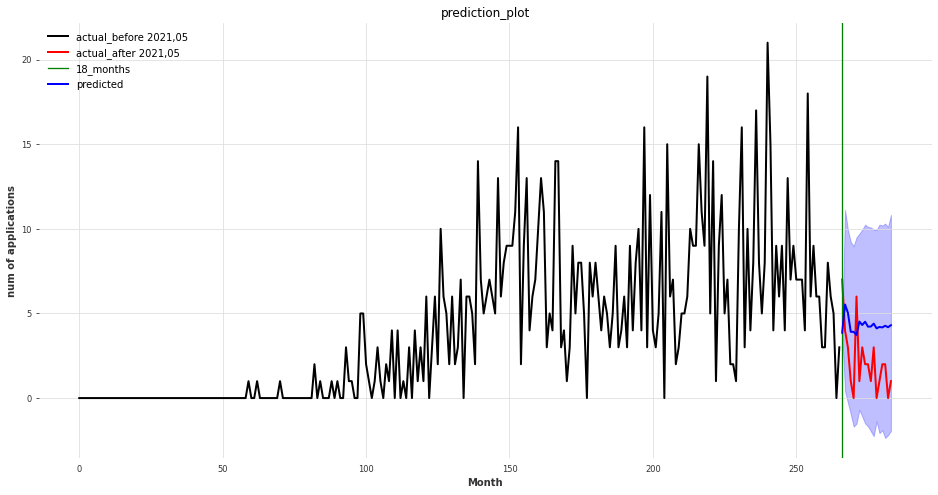

In [48]:
series_US,max_val,min_val = forward(US)
model_run(series_US, max_val, min_val, 18, ARIMA()) #ARIMA

206


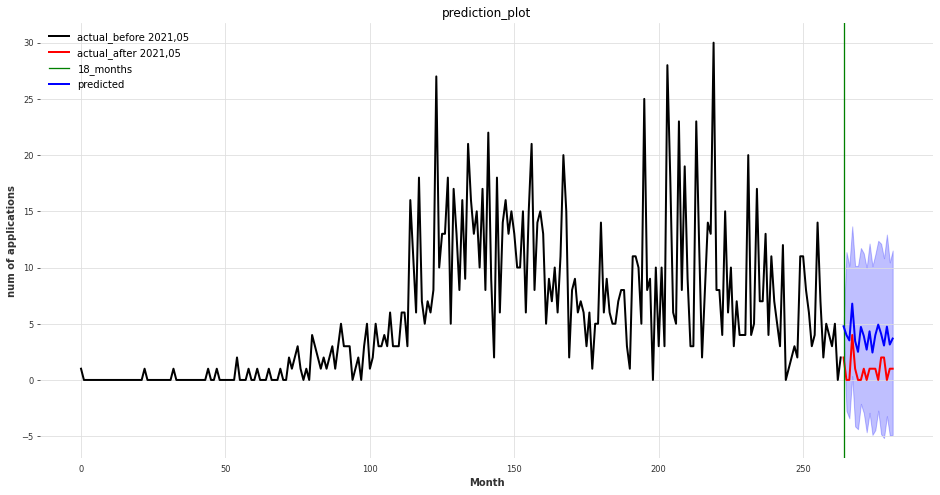

In [49]:
series_JP,max_val,min_val = forward(JP)
model_run(series_JP, max_val, min_val, 18, ARIMA()) #ARIMA

## TFT 트랜스포머기반 시계열 예측모델

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt

from darts import TimeSeries, concatenate
from darts.dataprocessing.transformers import Scaler
from darts.models import TFTModel
from darts.utils.statistics import check_seasonality, plot_acf
from darts.datasets import AirPassengersDataset, IceCreamHeaterDataset
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.utils.likelihood_models import QuantileRegression

import warnings

warnings.filterwarnings("ignore")
import logging

logging.disable(logging.CRITICAL)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
date = df['출원일'].apply(lambda x: dt.datetime.strptime(x[:7],"%Y-%m"))
min(date)
date.sort_values()

19995   1998-12-01
19659   2000-10-01
19633   2001-08-01
19136   2002-08-01
19475   2002-11-01
           ...    
56      2022-09-01
92      2022-09-01
81      2022-09-01
139     2022-09-01
30      2022-10-01
Name: 출원일, Length: 20000, dtype: datetime64[ns]

In [ ]:
s_data.sort_values(by='date')

,num,date
0,1,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
282,100,282
283,72,283
284,52,284
285,11,285


In [ ]:
def transform(num):
  year = 1998
  month = 12
  for i in range(num):
    month+=1
    if month==13:
      month=1
      year+=1
  year = str(year)
  month = str(month)
  return year+'-'+month+'-01'

for i in range(24):
  print(transform(i))

1998-12-01
1999-1-01
1999-2-01
1999-3-01
1999-4-01
1999-5-01
1999-6-01
1999-7-01
1999-8-01
1999-9-01
1999-10-01
1999-11-01
1999-12-01
2000-1-01
2000-2-01
2000-3-01
2000-4-01
2000-5-01
2000-6-01
2000-7-01
2000-8-01
2000-9-01
2000-10-01
2000-11-01


In [ ]:
a = s_data.sort_values(by='date',)
date_list = []
for i in a['date']:
  date_list.append(transform(i))
date_list

['1998-12-01',
 '1999-1-01',
 '1999-2-01',
 '1999-3-01',
 '1999-4-01',
 '1999-5-01',
 '1999-6-01',
 '1999-7-01',
 '1999-8-01',
 '1999-9-01',
 '1999-10-01',
 '1999-11-01',
 '1999-12-01',
 '2000-1-01',
 '2000-2-01',
 '2000-3-01',
 '2000-4-01',
 '2000-5-01',
 '2000-6-01',
 '2000-7-01',
 '2000-8-01',
 '2000-9-01',
 '2000-10-01',
 '2000-11-01',
 '2000-12-01',
 '2001-1-01',
 '2001-2-01',
 '2001-3-01',
 '2001-4-01',
 '2001-5-01',
 '2001-6-01',
 '2001-7-01',
 '2001-8-01',
 '2001-9-01',
 '2001-10-01',
 '2001-11-01',
 '2001-12-01',
 '2002-1-01',
 '2002-2-01',
 '2002-3-01',
 '2002-4-01',
 '2002-5-01',
 '2002-6-01',
 '2002-7-01',
 '2002-8-01',
 '2002-9-01',
 '2002-10-01',
 '2002-11-01',
 '2002-12-01',
 '2003-1-01',
 '2003-2-01',
 '2003-3-01',
 '2003-4-01',
 '2003-5-01',
 '2003-6-01',
 '2003-7-01',
 '2003-8-01',
 '2003-9-01',
 '2003-10-01',
 '2003-11-01',
 '2003-12-01',
 '2004-1-01',
 '2004-2-01',
 '2004-3-01',
 '2004-4-01',
 '2004-5-01',
 '2004-6-01',
 '2004-7-01',
 '2004-8-01',
 '2004-9-01',
 '20

In [ ]:
s_data = s_data.sort_values('date')
s_data['date'] = date_list
s_data

,num,date
0,1,1998-12-01
1,0,1999-1-01
2,0,1999-2-01
3,0,1999-3-01
4,0,1999-4-01
...,...,...
282,100,2022-6-01
283,72,2022-7-01
284,52,2022-8-01
285,11,2022-9-01


In [ ]:
series = TimeSeries.from_dataframe(s_data, 'date','num')

In [ ]:
series = series.astype(np.float32)
training_cutoff = pd.Timestamp("20200501")
train, val = series.split_after(training_cutoff)
transformer = Scaler()
train_transformed = transformer.fit_transform(train)
val_transformed = transformer.transform(val)
series_transformed = transformer.transform(series)

# create year, month and integer index covariate series
covariates = datetime_attribute_timeseries(series, attribute="year", one_hot=False)
covariates = covariates.stack(
    datetime_attribute_timeseries(series, attribute="month", one_hot=False)
)
covariates = covariates.stack(
    TimeSeries.from_times_and_values(
        times=series.time_index,
        values=np.arange(len(series)),
        columns=["linear_increase"],
    )
)
covariates = covariates.astype(np.float32)

# transform covariates (note: we fit the transformer on train split and can then transform the entire covariates series)
scaler_covs = Scaler()
cov_train, cov_val = covariates.split_after(training_cutoff)
scaler_covs.fit(cov_train)
covariates_transformed = scaler_covs.transform(covariates)

In [ ]:
# default quantiles for QuantileRegression
quantiles = [
    0.01,
    0.05,
    0.1,
    0.15,
    0.2,
    0.25,
    0.3,
    0.4,
    0.5,
    0.6,
    0.7,
    0.75,
    0.8,
    0.85,
    0.9,
    0.95,
    0.99,
]
input_chunk_length = 24
forecast_horizon = 12
my_model = TFTModel(
    input_chunk_length=input_chunk_length,
    output_chunk_length=forecast_horizon,
    hidden_size=64,
    lstm_layers=1,
    num_attention_heads=4,
    dropout=0.1,
    batch_size=16,
    n_epochs=300,
    add_relative_index=False,
    add_encoders=None,
    likelihood=QuantileRegression(
        quantiles=quantiles
    ),  # QuantileRegression is set per default
    # loss_fn=MSELoss(),
    random_state=42,
)

In [ ]:
my_model.fit(train_transformed, future_covariates=covariates_transformed, verbose=True)


Training: 0it [00:00, ?it/s]

Predicting: 14it [00:00, ?it/s]

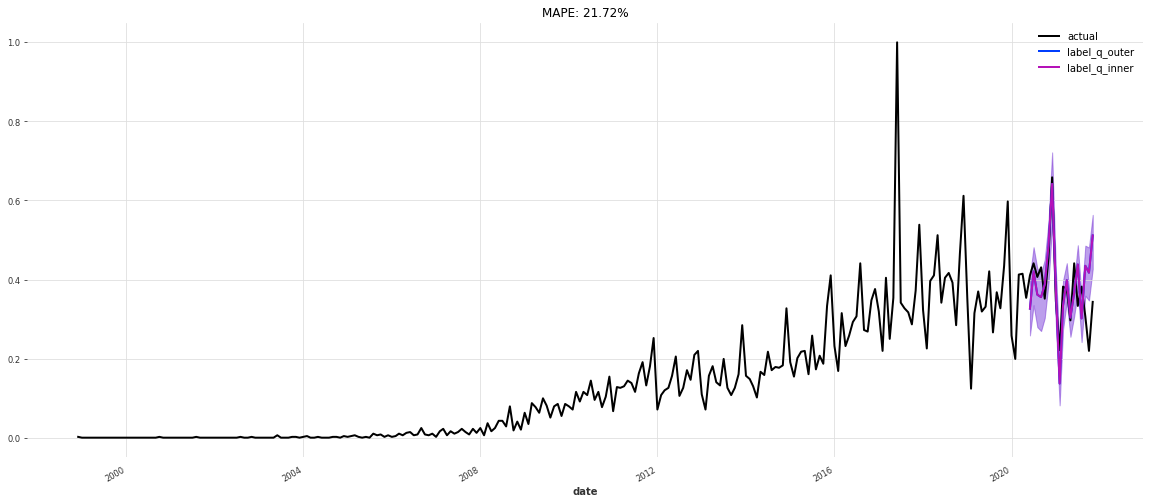

In [ ]:
def eval_model(model, n, actual_series, val_series):
    pred_series = model.predict(n=n, num_samples=1000)

    # plot actual series
    plt.figure(figsize=(20,8))
    actual_series[: pred_series.end_time()].plot(label="actual")

    # plot prediction with quantile ranges
    pred_series.plot(
        low_quantile=min(quantiles), high_quantile=max(quantiles), label='label_q_outer'
    )
    pred_series.plot(low_quantile=min(quantiles), high_quantile=max(quantiles), label='label_q_inner')

    plt.title("MAPE: {:.2f}%".format(mape(val_series, pred_series)))
    plt.legend()


eval_model(my_model, 18, series_transformed, val_transformed)